<h1>Intermediate level Task</h1>
<h2>Task 6: Prediction using Decision Tree  Algorithm </h2>

<b>Name: Sumant Pujari</b>

In [ ]:
#import required libraries

#for data manipulation
import numpy as np
import pandas as pd
import seaborn as sns

#for model building
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# for model visualisation
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

**# Import Dataset from drive**

In [ ]:
#fetch dataset from drive
dataset = pd.read_csv("/content/drive/MyDrive/Data_Science/Datasets/DecisionTree/Iris.csv")

#Take a look at the dataset
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**# Data Analysis and Manipulation**

In [ ]:
# Dataset size (rows,cols)
print("Size of the dataset is as",dataset.shape)

Size of the dataset is as (150, 6)


In [ ]:
# Number of empty cells in Dataset
dataset.isnull().sum() 

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
# Dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
# Statistical description of Dataset
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
#delete useless columns
dataset.drop('Id',axis='columns',inplace=True)
dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# Name and Number of unique species
print("Number of unique species are:",len(dataset["Species"].unique()))
print("Unique Iris Species are: ",end="")
for i in dataset["Species"].unique():
  print(i,end=", ")

Number of unique species are: 3
Unique Iris Species are: Iris-setosa, Iris-versicolor, Iris-virginica, 

In [ ]:
# Save Species in a Array
Species = dataset.values[:,4]
Species

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [ ]:
# Save Every Column except Species 
data_except_species=dataset.columns[:4]
data_except_species

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

**# Build Model For Decision Tree Classifier**

In [ ]:
# Divide Dataset into X and y variables
X_train = dataset.drop('Species', axis=1)
y_train = dataset['Species']

In [ ]:
# Print X_train 
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# Print y_train 
print(y_train.head())

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object


In [ ]:
# Split data into training and testing dataset in ratio 80:20
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2,random_state=100)

In [ ]:
# Print Size of Training and Testing Set of X and y variables
print("Size of X_train:",X_train.shape,"\tSize of X_test",X_test.shape)
print("Size of y_train:",y_train.shape,"\tSize of y_test",y_test.shape)

Size of X_train: (120, 4) 	Size of X_test (30, 4)
Size of y_train: (120,) 	Size of y_test (30,)


In [ ]:
# Decision Tree Classifier is being intialised
decisionTree = DecisionTreeClassifier(criterion="entropy")
decisionTree=decisionTree.fit(X_train, y_train)

In [ ]:
TrainAccuracy = accuracy_score(y_train,decisionTree.predict(X_train))
print('Training Accuracy is: ',TrainAccuracy)

Training Accuracy is:  1.0


In [ ]:
TestAccuracy = accuracy_score(y_test,decisionTree.predict(X_test))
print('Test Accuracy is: ',TestAccuracy)

Test Accuracy is:  0.9666666666666667


**# Decision Tree Visualisation**

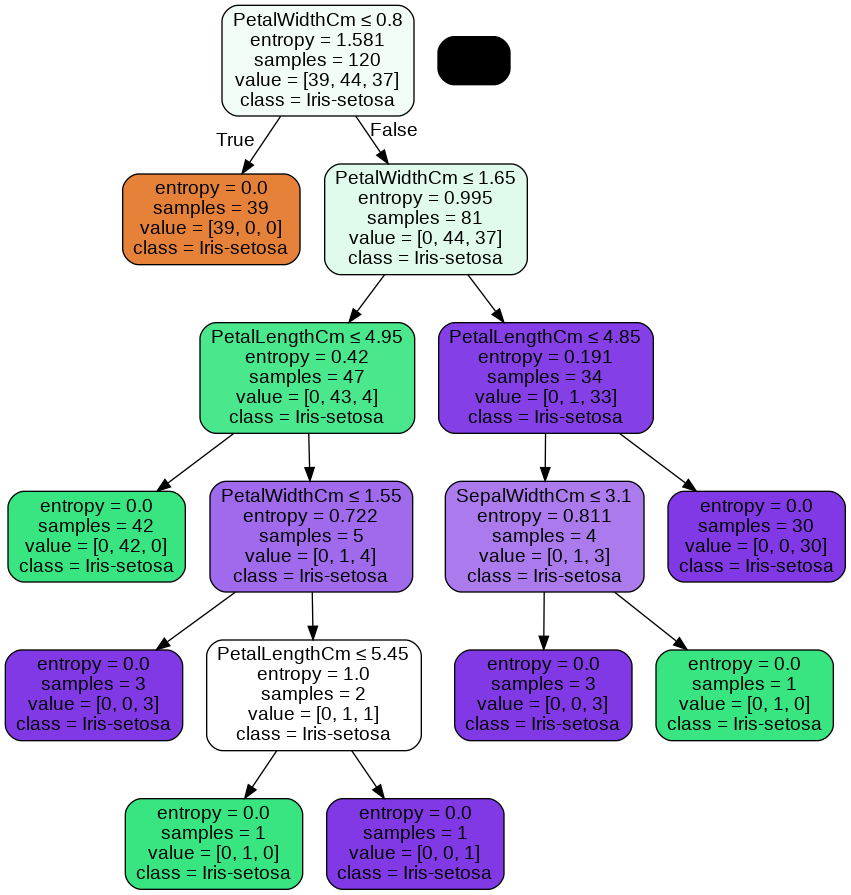

In [ ]:
dot_data = StringIO()
export_graphviz(decisionTree, out_file=dot_data, filled=True, rounded=True,special_characters=True,feature_names =data_except_species,class_names = Species)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Iris.png')
Image(graph.create_png())

<b>Conclusion:<br>
Created a Decision Tree Classifier and visualized.<br>
As per Decision Tree, new data will be predicted to its right class</b>